In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
df=pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [12]:
#data preprocessing
df.isnull().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [16]:
m=df.mean()
df.fillna(m,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [17]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [18]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [20]:
df.shape

(3276, 10)

In [26]:
#Feature Selection
potability=df['Potability']
c=df.Potability.value_counts()
c


0    1998
1    1278
Name: Potability, dtype: int64

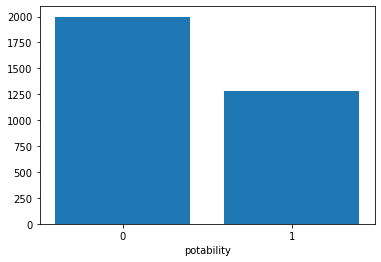

In [39]:
plt.bar(['0','1'],c)
plt.xlabel('potability')
plt.show()

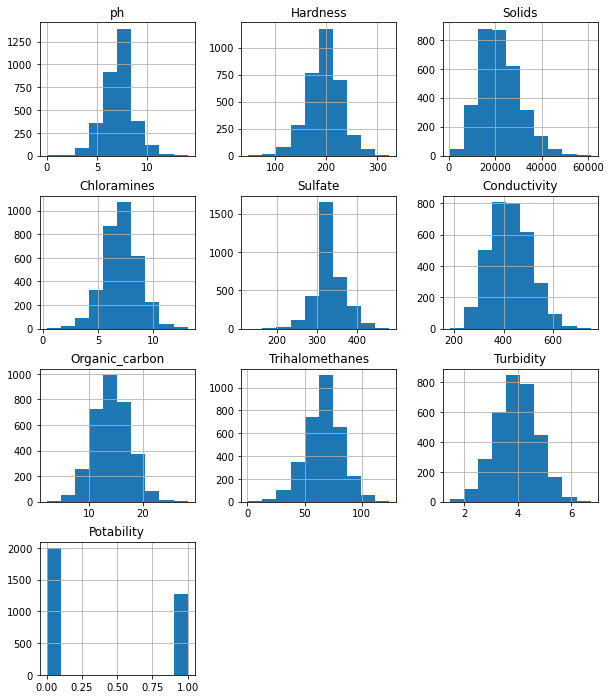

In [44]:
df.hist(figsize=(10,12))
plt.show()

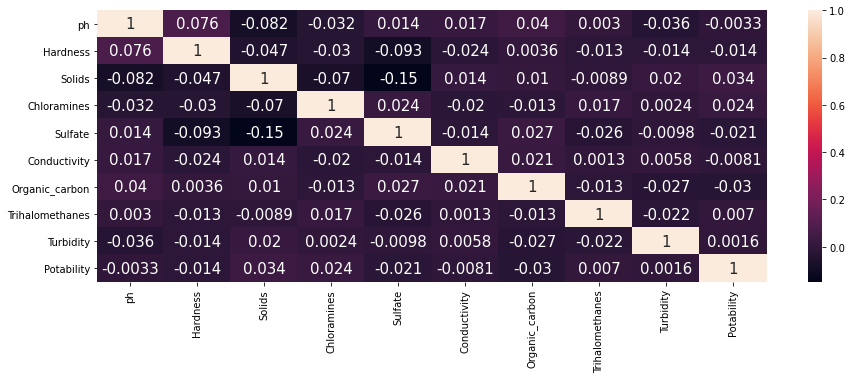

In [53]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15, 5))

sns.heatmap(df.corr(),annot=True,annot_kws={'size': 15})
plt.show()

In [55]:
x=df.drop('Potability',axis=1)
y=df['Potability']

In [56]:
#splitting data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,
                                               random_state=101,shuffle=True)

In [57]:
#Model building
#1.)Logistic Regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=2)

In [58]:
log.fit(x_train,y_train)

LogisticRegression(random_state=2)

In [59]:
y_pred=log.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [61]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
cm

array([[402,   0],
       [254,   0]], dtype=int64)

In [64]:
logacc=accuracy_score(y_test,y_pred)
logacc

0.6128048780487805

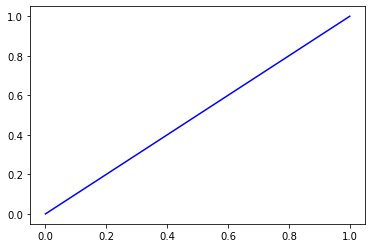

In [70]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,'b')

plt.show()

In [78]:
classification_report(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       402
           1       0.00      0.00      0.00       254

    accuracy                           0.61       656
   macro avg       0.31      0.50      0.38       656
weighted avg       0.38      0.61      0.47       656



In [81]:
#SVC(kernel='sigmoid')
#2.)SVM
from sklearn.svm import SVC
s=SVC(kernel='sigmoid')
s.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [174]:
y_pred2=s.predict(x_test)
y_pred2


array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,

In [175]:
cm2=confusion_matrix(y_test,y_pred2)
cm2

array([[237, 165],
       [146, 108]], dtype=int64)

In [134]:
svmacc=accuracy_score(y_test,y_pred2)
svmacc

0.5259146341463414

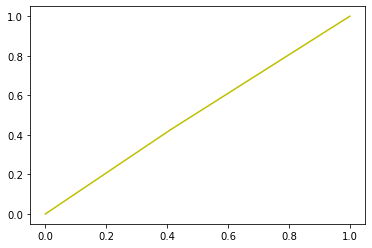

In [91]:
fpr2,tpr2,threshold2=roc_curve(y_test,y_pred2)
plt.plot(fpr2,tpr2,'y')
plt.show()

In [94]:
classification_report(y_test,y_pred2)

              precision    recall  f1-score   support

           0       0.62      0.59      0.60       402
           1       0.40      0.43      0.41       254

    accuracy                           0.53       656
   macro avg       0.51      0.51      0.51       656
weighted avg       0.53      0.53      0.53       656



In [113]:
#3.)Decision tree
from sklearn.tree import DecisionTreeClassifier
m=DecisionTreeClassifier()
d=DecisionTreeClassifier(criterion="gini",min_samples_split=12,
                         splitter="best")


In [114]:
d.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=12)

In [176]:
pred3=d.predict(x_test)
pred3


array([1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,

In [177]:
dacc=accuracy_score(y_test,pred3)
dacc

0.5990853658536586

In [122]:
confusion_matrix(y_test,pred3)

[[279 123]
 [140 114]]


In [123]:
classification_report(y_test,pred3)

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       402
           1       0.48      0.45      0.46       254

    accuracy                           0.60       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.59      0.60      0.60       656



In [118]:
roc_auc_score(y_test,pred3)

0.571424374192032

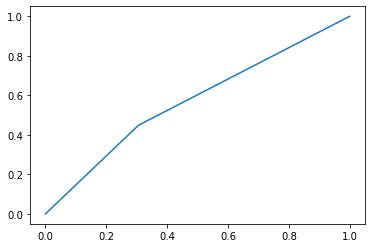

In [119]:
fpr3,tpr3,threshold3=roc_curve(y_test,pred3)
plt.plot(fpr3,tpr3)
plt.show()

In [125]:
#4.Bagging
from sklearn.ensemble import BaggingClassifier
b=BaggingClassifier(base_estimator=m,n_estimators=500,random_state=8)


In [126]:
b.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  random_state=8)

In [128]:
y_pred4=b.predict(x_test)

In [130]:
bacc=accuracy_score(y_test,y_pred8)
bacc

0.6859756097560976

In [129]:
cm4=confusion_matrix(y_test,y_pred4)
cm4

array([[343,  59],
       [147, 107]], dtype=int64)

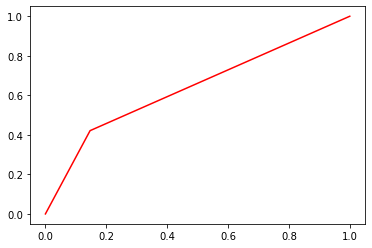

In [178]:
fpr4,tpr4,threshold4=roc_curve(y_test,y_pred4)
plt.plot(fpr4,tpr4,'r')
plt.show()

In [179]:
accuracy={'Logstic Regression':logacc*100,'SVM':svmacc*100,
          'Decision Tree':dacc*100,'Bagging Classifier':bacc*100}


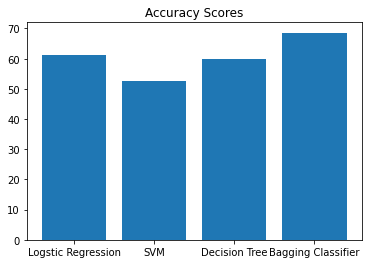

In [180]:
plt.bar(accuracy.keys(),accuracy.values())
plt.title("Accuracy Scores")
plt.show()



In [181]:
v=list(accuracy.values())
k=list(accuracy.keys())
for i in range(len(accuracy)):
    if v[i]==max(v):
        index=i
print("MAXIMUM ACCURACY FOR POTABILITY IS GIVEN BY:\n",k[index] ,"=",v[i],'%')

MAXIMUM ACCURACY FOR POTABILITY IS GIVEN BY:
 Bagging Classifier = 68.59756097560977 %
